In [ ]:
install.packages(c("Stat2Data"))
library(Stat2Data)
data("MedGPA")
head(MedGPA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


In [ ]:
names(MedGPA)

[1] "Accept"     "Acceptance" "Sex"        "BCPM"       "GPA"       
 [6] "VR"         "PS"         "WS"         "BS"         "MCAT"      
[11] "Apps"

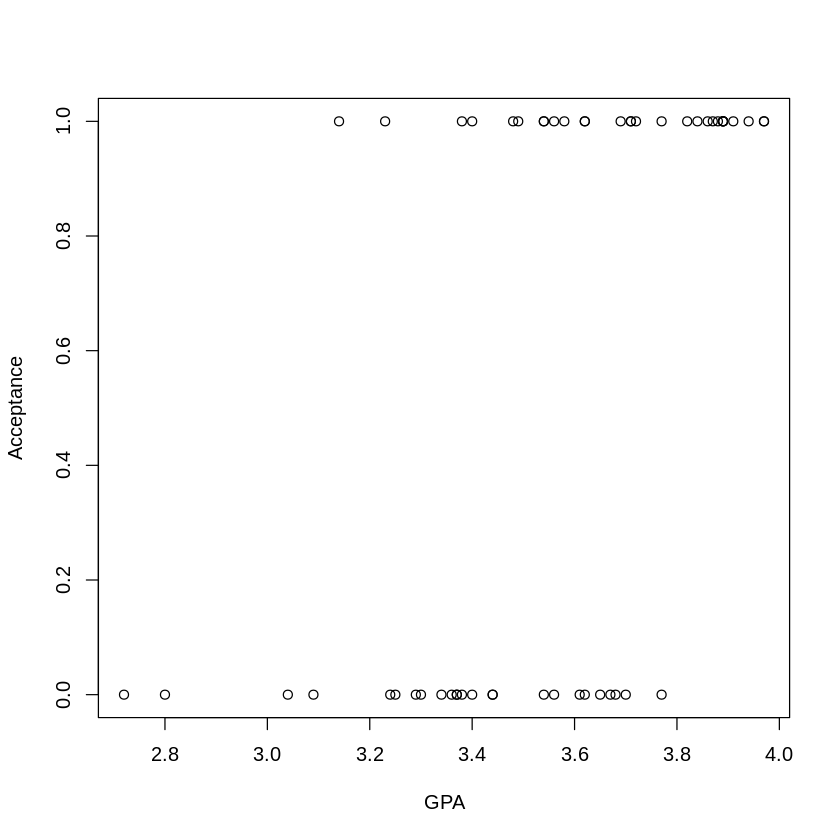

In [ ]:
# modelling on acceptance(0/1) using GPA(Q)
plot(Acceptance~GPA, data = MedGPA)

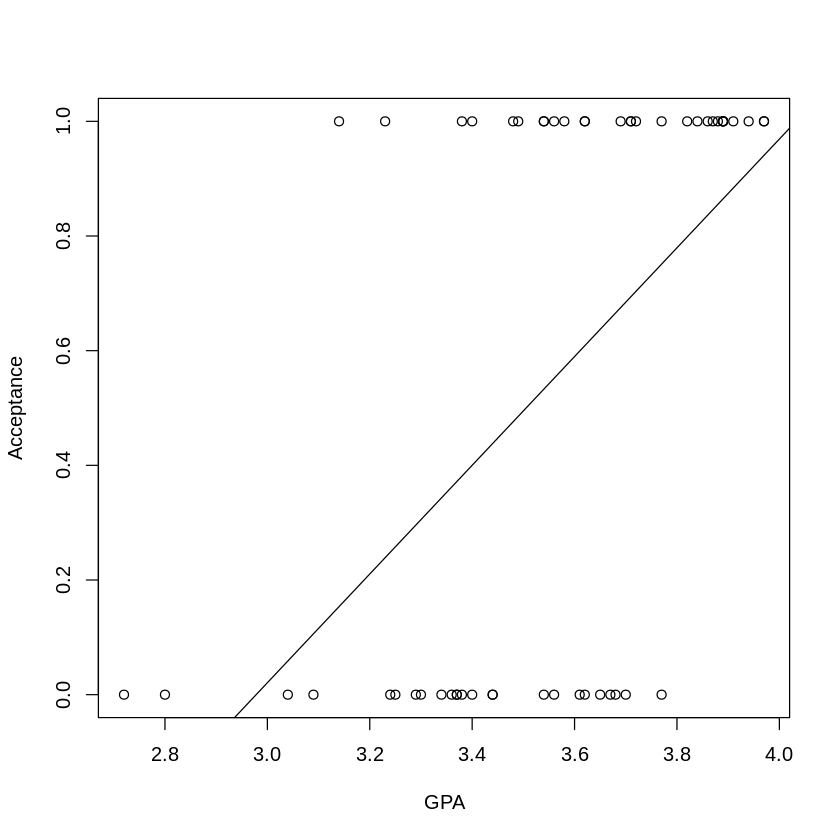

In [ ]:
# What happens when we use linear regression?
plot(Acceptance~GPA, data = MedGPA)
lml = lm(Acceptance~GPA, data = MedGPA)
abline(lml)

In [ ]:
# logistic regression (binary response)
glm(Acceptance~GPA, data = MedGPA, family = "binomial")


Call:  glm(formula = Acceptance ~ GPA, family = "binomial", data = MedGPA)

Coefficients:
(Intercept)          GPA  
    -19.207        5.454  

Degrees of Freedom: 54 Total (i.e. Null);  53 Residual
Null Deviance:	    75.79 
Residual Deviance: 56.84 	AIC: 60.84

Here, we can see that our model is:

```
logit (pi/1-pi) = -19.207 + 5.454 * GPA
```


We can say that as GPA goes up by 1 unit, the log(odd) will also increase by 5.454 units.



In [ ]:
GPA = 4
-19.207 + 5.454 * GPA

[1] 2.609

## Multiple Binary Logistic Regression
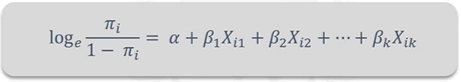


**Predicting Acceptance using GPA, MCAT and Sex**

In [ ]:
model2 = glm(Acceptance ~ GPA + MCAT + Sex, data = MedGPA, family = "binomial")
summary(model2)


Call:
glm(formula = Acceptance ~ GPA + MCAT + Sex, family = "binomial", 
    data = MedGPA)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -23.9851     6.9685  -3.442 0.000578 ***
GPA           5.1392     1.8508   2.777 0.005491 ** 
MCAT          0.1809     0.1080   1.675 0.093946 .  
SexM         -1.2580     0.7303  -1.723 0.084965 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 50.786  on 51  degrees of freedom
AIC: 58.786

Number of Fisher Scoring iterations: 5


In [ ]:
# lets see our values of log(odds)
coef(model2)

(Intercept)         GPA        MCAT        SexM 
-23.9851321   5.1392325   0.1808842  -1.2579887

In [ ]:
#odd ratio
odd_ratio = exp(coef(model2))
odd_ratio

(Intercept)          GPA         MCAT         SexM 
3.831682e-11 1.705848e+02 1.198276e+00 2.842251e-01